In [1]:
1+1

2

In [2]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [3]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH17-LangGraph")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH17-LangGraph


In [4]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]

In [5]:
from langchain_openai import ChatOpenAI

# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}

In [6]:
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)

In [7]:
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")

In [8]:
# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)

In [9]:
# 그래프 컴파일
graph = graph_builder.compile()

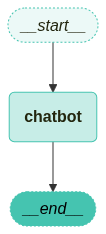

In [10]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(graph)

In [11]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: 서울에는 다양한 맛집이 많아서 선택하기가 쉽지 않지만, 다음은 서울에서 유명한 맛집 TOP 10을 추천해 드립니다. 각 식당은 고유의 매력을 가지고 있으니 참고해 보세요!

1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.

2. **부암동 카페거리** - 예쁜 카페와 맛있는 디저트가 많은 곳으로, 특히 '카페 드 파리'의 생과일 빙수가 유명합니다.

3. **이태원 앤틱 가구 거리** - 다양한 국제 요리를 즐길 수 있는 곳으로, '부리또'와 '타이 음식'이 인기입니다.

4. **명동 교자** - 칼국수와 만두가 유명한 맛집으로, 항상 많은 사람들이 줄 서서 기다립니다.

5. **삼청동 수제비** - 전통 수제비와 다양한 한식을 제공하는 곳으로, 아늑한 분위기에서 식사를 즐길 수 있습니다.

6. **신사동 가로수길** - 다양한 트렌디한 레스토랑과 카페가 모여 있는 곳으로, '브런치 카페'가 특히 인기가 많습니다.

7. **종로 통인시장** - 다양한 전통 음식을 맛볼 수 있는 시장으로, 특히 '김밥'과 '떡'이 유명합니다.

8. **홍대입구** - 다양한 음식점과 바가 밀집해 있는 지역으로, '버거'와 '퓨전 한식'이 인기입니다.

9. **압구정 로데오거리** - 고급 레스토랑과 카페가 많은 곳으로, '스테이크'와 '일식'이 유명합니다.

10. **여의도 한강공원** - 피크닉을 즐기며 다양한 길거리 음식을 맛볼 수 있는 곳으로, 특히 '치킨'과 '맥주'가 인기입니다.

각 지역마다 특색 있는 음식과 분위기를 즐길 수 있으니, 방문해 보시길 추천합니다!
